# Modelo Epidemiológico - COVID-19 en Italia


El siguiente codigo implementa un modelo epidemiológico SEIR para el COVID-19 en Italia desde febrero hasta junio, utilizando ecuaciones diferenciales y el método de Runge-Kutta de cuarto orden.

# Derivacion del modelo
La derivacion del modelo es la misma que en el caso anterior ([Ver Modelo Covid](modelo-covid.ipynb)). Unicamente es que aqui lo que se pretende es simular el problema principal. Es decir, el modelo SEILR.

Tambien, se agregara otra funcion llamada u(t) que multiplicara a $\beta$ modelando el problema no lineal.
$$
\begin{align}
    \frac{dS}{dt} &= -\frac{\beta u IS}{N} \tag{1} \\
    \frac{dE}{dt} &= \frac{\beta IS}{N} - \epsilon E \tag{2} \\
    \frac{dI}{dt} &= \epsilon E - \gamma I \tag{3} \\
    \frac{dL}{dt} &= \gamma I - \delta L \tag{4} \\
    \frac{dR}{dt} &= \delta L \tag{5} \\
    \frac{du}{dt} &= 0.106 t_a -0.6023 \tag{6}
\end{align}
$$
Siendo:
- $N$: _La población total._
- $S$: El número de individuos Susceptibles.
- $E$: El número de individuos Expuestos que han contraído la infección pero aún no son infecciosos.
- $I$: El número de individuos Infectados.
- $L$: El número de sujetos que aún están infectados pero ya no son infecciosos debido a hospitalización, cuarentena, o porque los sujetos infectados son mayormente infecciosos solo durante los primeros días después del final del período de latencia.
- $R$: El número de individuos Recuperados y resistentes a futuras infecciones.
- $\beta$: La tasa de transmisión efectiva.
- $\epsilon$: La tasa inversa del período promedio de incubación antes de que uno se vuelva infeccioso.
- $\gamma$: La tasa inversa del tiempo promedio que los sujetos infectados pasan siendo infecciosos.
- $\delta$: La tasa inversa del tiempo promedio que los sujetos infectados permanecen enfermos pero no infecciosos.


In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Definicion de las ecuaciones diferenciales del sistema

In [67]:
def edoU(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return 0.106*t-0.6023

In [68]:
def edoS(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return -beta * (0.053*t*t-0.6023*t+1.5488)*I * y / N

In [69]:
def edoE(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return beta * I * S / N - epsilon * y

In [70]:
def edoI(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return epsilon * E - landa * y

In [71]:
def edoL(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return landa * I - delta * y

In [72]:
def edoR(y, t, beta, I, S, N, E, L, R, U, epsilon, landa, delta):
    return delta * L

Una vez definidas las ecuaciones diferenciales del sistema, procedemos a resolverlo usando metodos numericos. Runge-Kutta de 4to orden.

In [73]:
def runge_kutta_cuarto_orden(fS, fE, fI, fL, fR,fU, S0, E0, I0, L0, R0, U0, t0, tf, h, beta, N, epsilon, landa, delta):
    # Implementa el método de Runge-Kutta de cuarto orden
    tiempo = np.arange(t0, tf + h, h)
    resS = []
    resE = []
    resI = []
    resL = []
    resR = []
    resU = []

    S_actual = S0
    E_actual = E0
    I_actual = I0
    L_actual = L0
    R_actual = R0
    U_actual = U0
    for t in tiempo:
        resS.append(S_actual)
        k1 = h * fS(S_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k2 = h * fS(S_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k3 = h * fS(S_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k4 = h * fS(S_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        S_actual = S_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resE.append(E_actual)
        k1 = h * fE(E_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fE(E_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k3 = h * fE(E_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fE(E_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        E_actual = E_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resI.append(I_actual)
        k1 = h * fI(I_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fI(I_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k3 = h * fI(I_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fI(I_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        I_actual = I_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resL.append(L_actual)
        k1 = h * fL(L_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fL(L_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual,epsilon, landa, delta)
        k3 = h * fL(L_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fL(L_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        L_actual = L_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resR.append(R_actual)
        k1 = h * fR(R_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k2 = h * fR(R_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k3 = h * fR(R_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fR(R_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        R_actual = R_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6

        resU.append(U_actual)
        k1 = h * fU(U_actual, t, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual,U_actual, epsilon, landa, delta)
        k2 = h * fU(U_actual + 0.5 * k1, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual,epsilon, landa, delta)
        k3 = h * fU(U_actual + 0.5 * k2, t + 0.5 * h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        k4 = h * fU(U_actual + k3, t + h, beta, I_actual, S_actual, N, E_actual, L_actual, R_actual, U_actual, epsilon, landa, delta)
        U_actual = U_actual + (k1 + 2 * k2 + 2 * k3 + k4) / 6


    return tiempo, np.array(resS), np.array(resE), np.array(resI), np.array(resL), np.array(resR), np.array(resU)


# Condiciones iniciales y llamado de la funcion

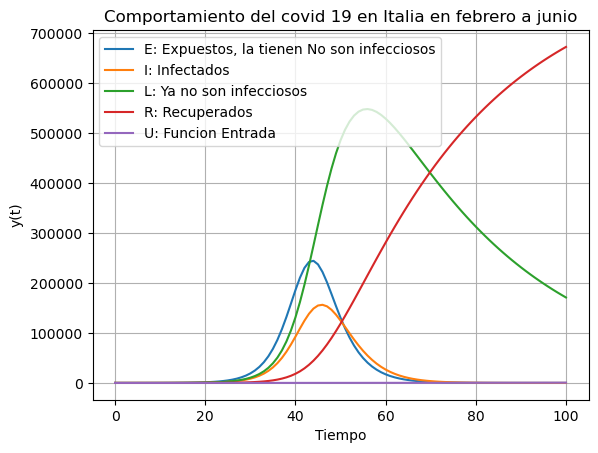

In [74]:
# Parámetros iniciales
S0 = 59100000  # Condición inicial
E0 = 5  # Condición inicial
I0 = 3  # Condición inicial
L0 = 1  # Condición inicial
R0 = 1  # Condición inicial
U0 = 1  # Condición inicial
t0 = 0  # Tiempo inicial
tf = 100  # Tiempo final
h = 1  # Tamaño de paso
beta = 1.3
N = 59100000
epsilon = 1 / 4.3
landa = 1 / 3.1
delta = 1 / 33

# Resuelve la ecuación diferencial utilizando Runge-Kutta de cuarto orden
tiempo, S, E, I, L, R, U = runge_kutta_cuarto_orden(edoS, edoE, edoI, edoL, edoR,edoU, S0, E0, I0, L0, R0, U0, t0, tf, h, beta, N, epsilon, landa, delta)

# Grafica los resultados
plt.plot(tiempo, E, label='E: Expuestos, la tienen No son infecciosos')
#plt.plot(tiempo, S, label='S: Susceptibles')
plt.plot(tiempo, I, label='I: Infectados')
plt.plot(tiempo, L, label='L: Ya no son infecciosos')
plt.plot(tiempo, R, label='R: Recuperados')
plt.plot(tiempo, U, label='U: Funcion Entrada')
plt.xlabel('Tiempo')
plt.ylabel('y(t)')
plt.title('Comportamiento del covid 19 en Italia en febrero a junio')
plt.legend()
plt.grid(True)
plt.show()